# Wine Data Analysis 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Datasets

In [10]:
### Datasets ###
red_wine = pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_2/Sprint_1/winequality-red.csv', sep=';')
white_wine =  pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_2/Sprint_1/winequality-white.csv', sep= ';')

## Data Wrangling ##

In [11]:
##### Data Enriching ##### ... creating new columns that will help define the targets for each model. 

# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

red_wine['wine_type'] = 'red'

# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine['wine_type'] = 'white'

In [12]:
# Data Structuring # 
# This step includes merging datasets, separating single columns into several
# or combining several columns into a single column. 

wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)


In [19]:
# Data Cleaning # 
# This step includes: 
# missing values 
# duplicates
# Standardize formats and input ranges. 
# Change data to correct type.
# Remove outliers 
# Correct misspellings 

wines = wines.drop_duplicates()



In [14]:
wines = wines.drop(['quality'],axis=1)
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,high,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,low,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,medium,white
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,medium,white
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,medium,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6490,5.9,0.26,0.24,2.4,0.046,27.0,132.0,0.99234,3.63,0.73,11.3,low,white
6491,8.0,0.34,0.49,9.0,0.033,39.0,180.0,0.99360,3.13,0.38,12.3,high,white
6493,5.6,0.28,0.27,3.9,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,medium,white
6494,6.4,0.37,0.20,5.6,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,low,white


## Exploratory Data Analysis ## 

In [15]:
wines.head()
wines.tail()

print(wines.shape)

(5320, 13)


Text(0.5, 1.0, 'Wines')

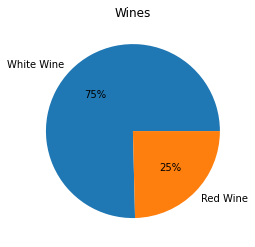

In [16]:
plt.pie(x=[white_wine.shape[0],red_wine.shape[0]], labels=['White Wine', 'Red Wine'], autopct = '%0.0f%%')
plt.savefig('wines_count.png', facecolor='w')
plt.title('Wines')

### Univariate Analysis ### 

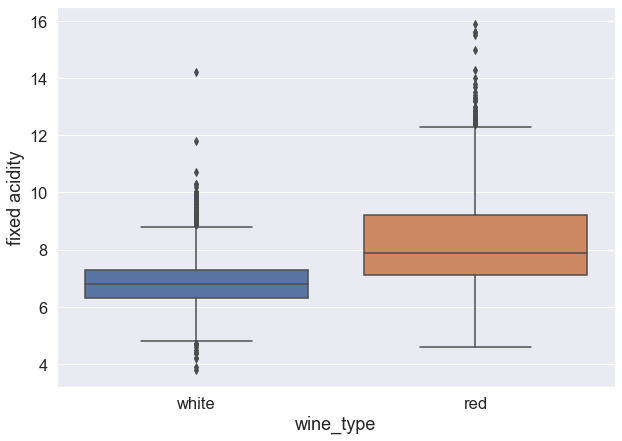

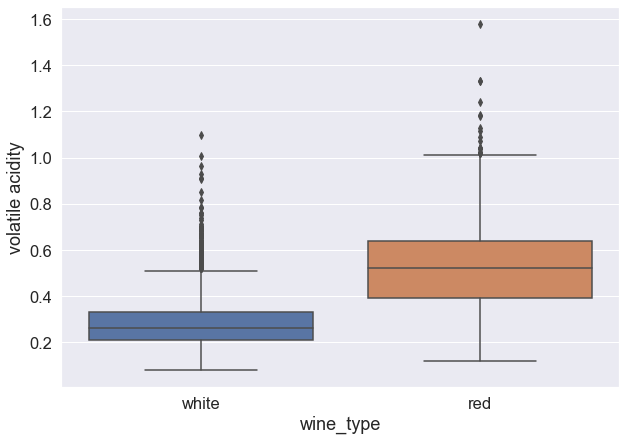

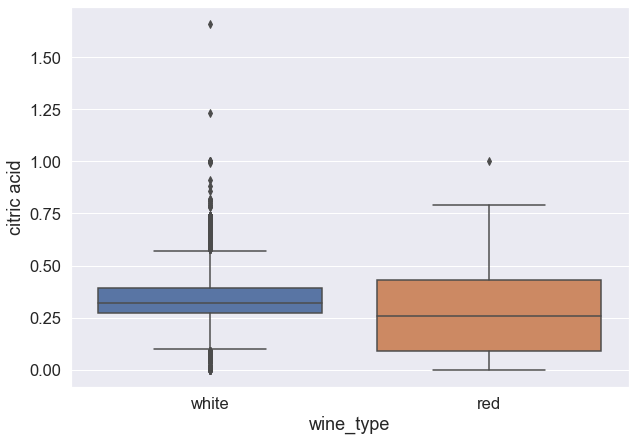

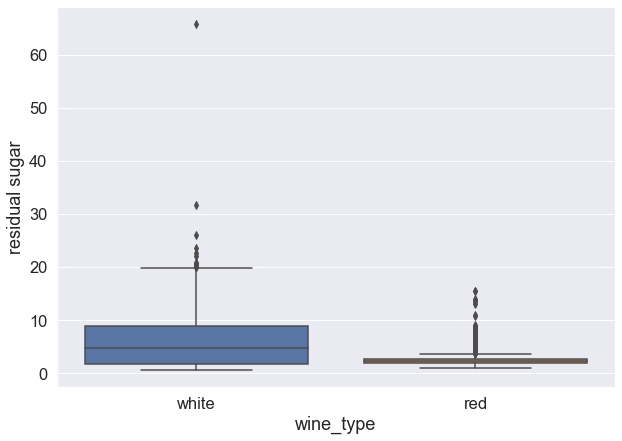

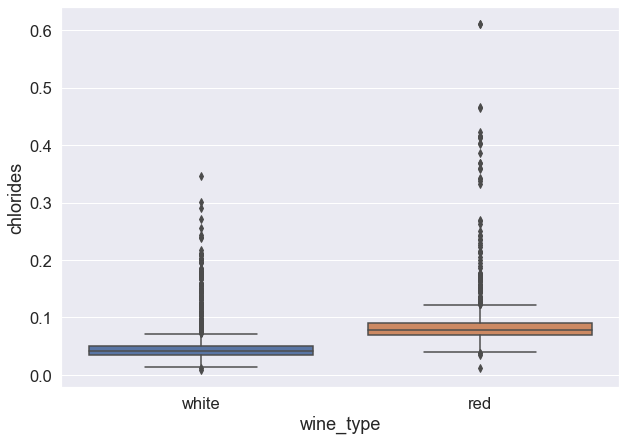

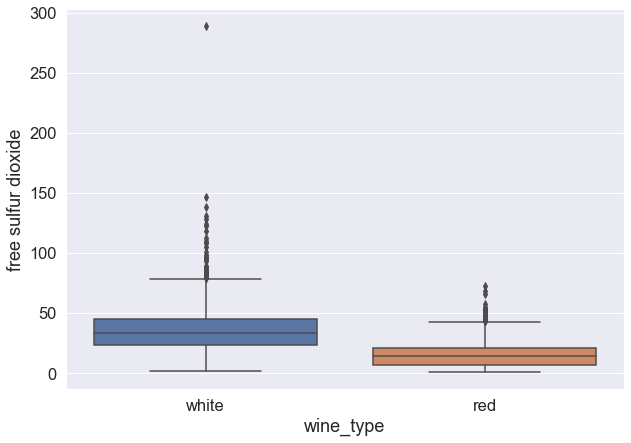

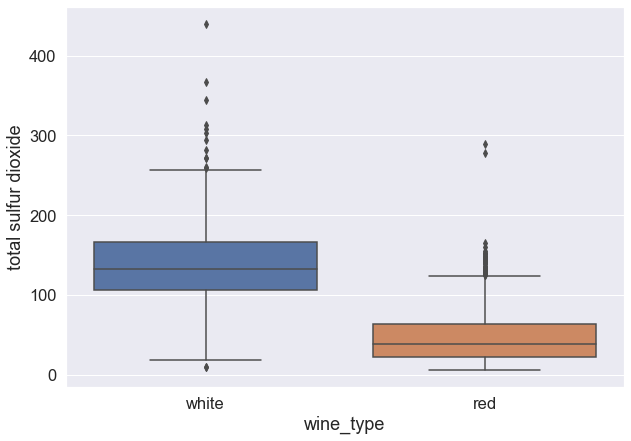

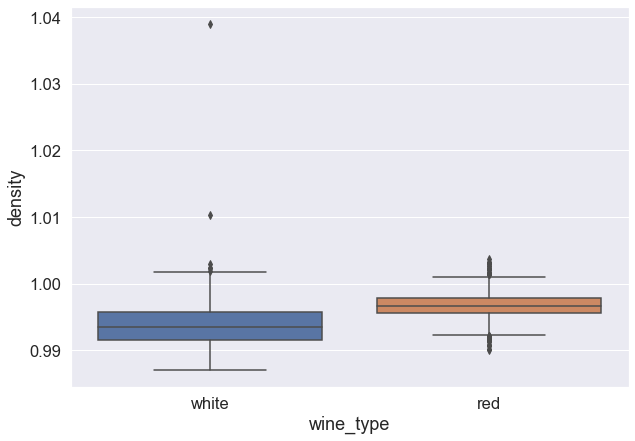

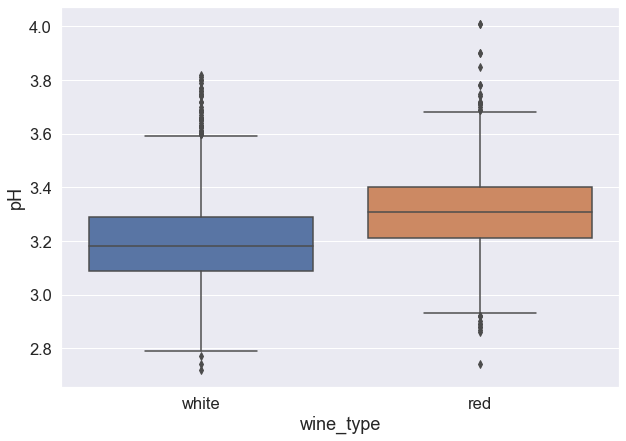

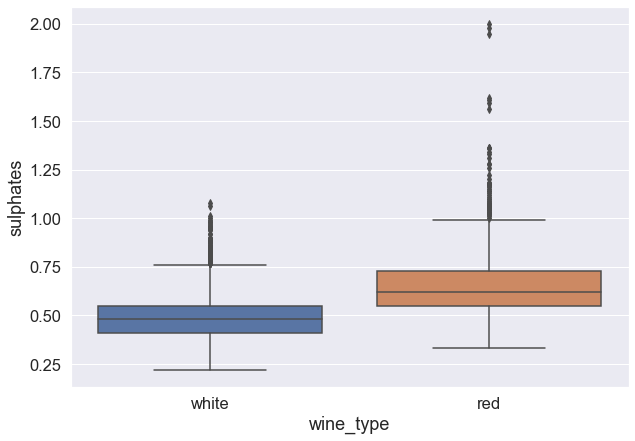

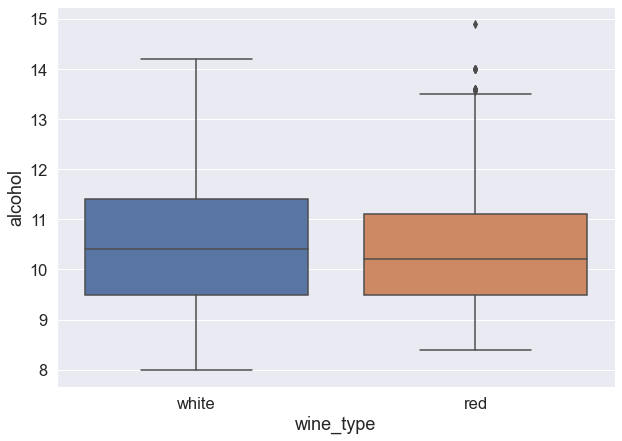

In [17]:
features = wines.select_dtypes(include=['float64'])

for feature in features: 

        fig = plt.figure()

        
        # Seaborn Aesthetics Settings 
        sns.set_theme()
        sns.set_context()
        
        fig.set_size_inches(10,7)
        sns.set(font_scale = 1.5)
        sns.boxplot(x=wines['wine_type'],y=wines[feature])
        
        plt.show()    


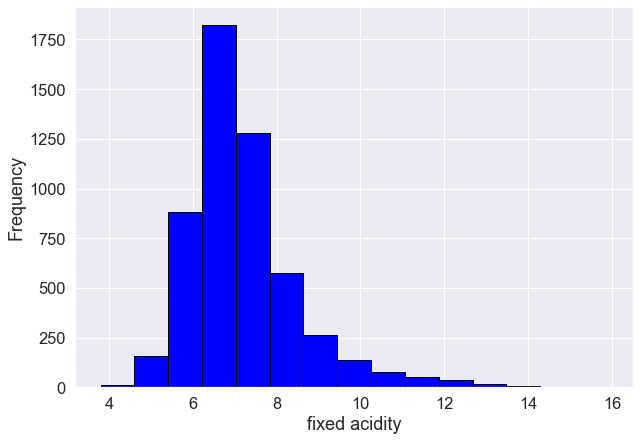

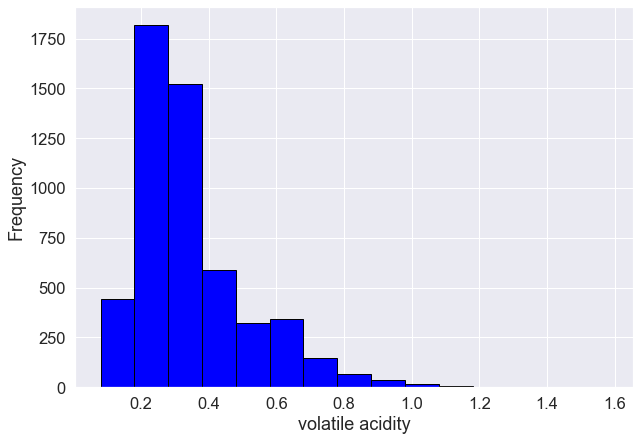

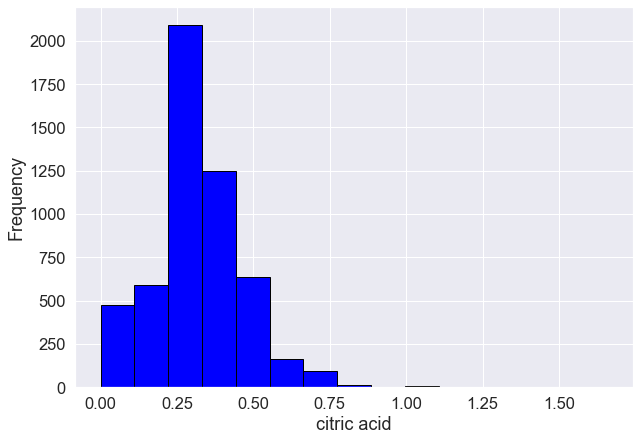

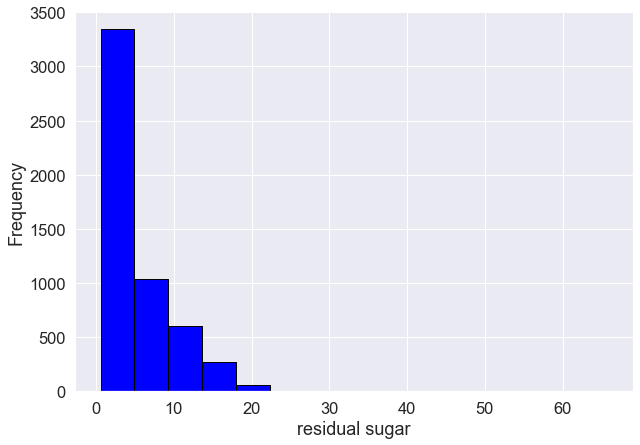

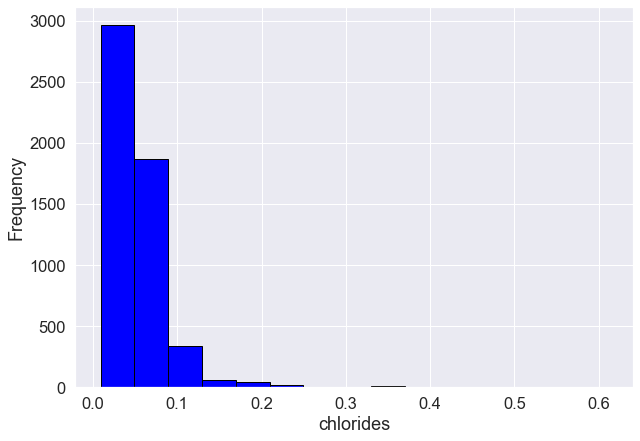

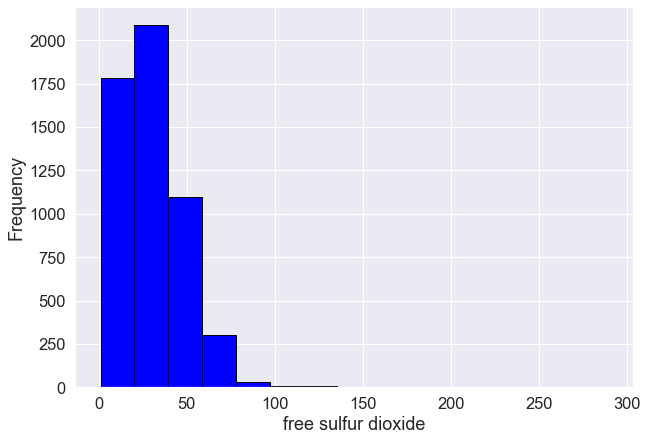

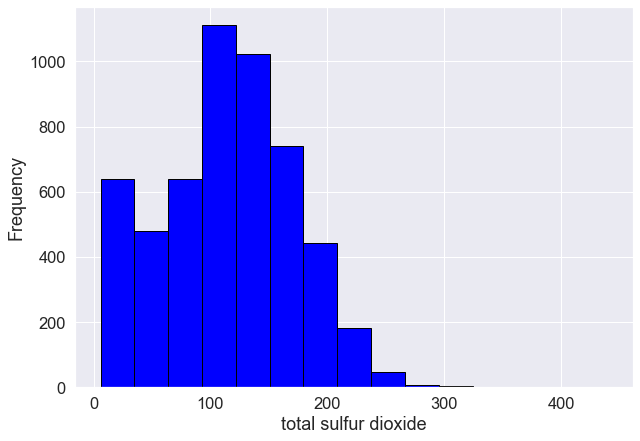

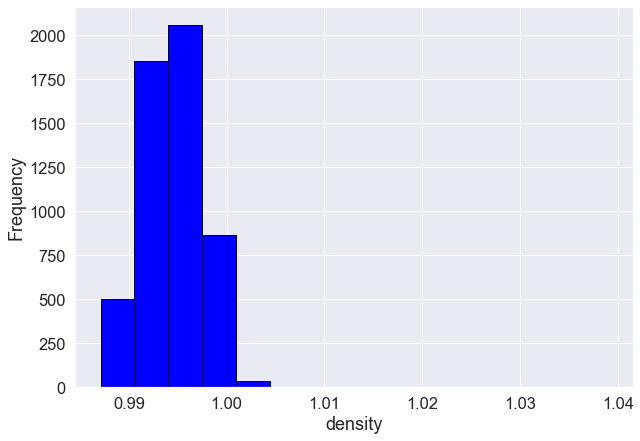

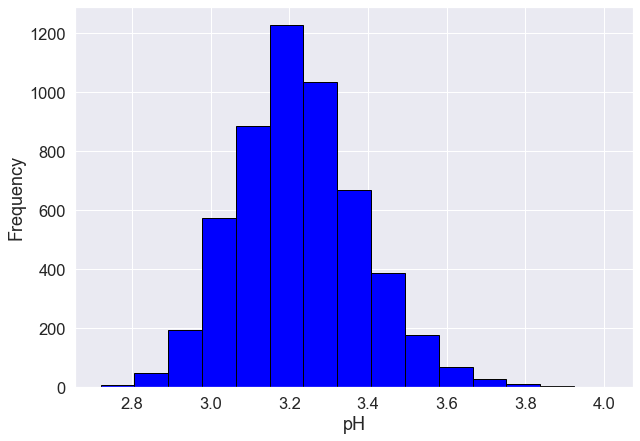

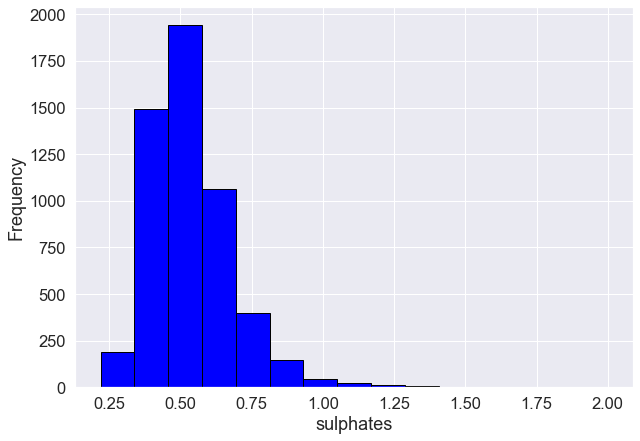

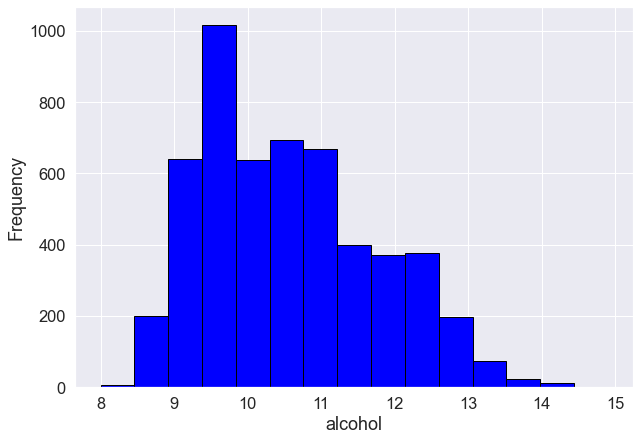

In [18]:
features = wines.select_dtypes(include=['float64']).columns

for feature in features: 

        
        fig = plt.figure()
        fig.set_size_inches(10,7)

        wines[feature].plot.hist(bins=15, color='blue', edgecolor='black', linewidth=1.0)
        plt.xlabel(feature)
        #plt.title('Red Wine')
        plt.show() 
        #break

#### Observations from Univariate Analysis: 

#### Wine Type: 
#### Difference between red and white wine for each feature. Outliers are present. The data is positively skewed. 



#### Outlier Removal 

In [20]:
feature = 'fixed acidity'

q1 = wines[feature].quantile(0.25)
q3 = wines[feature].quantile(0.75)
iqr = q3 - q1 
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr) 

wines = wines.loc[(wines[feature] >= lower_bound) & (wines[feature] <= upper_bound)]

#### We chose alcohol as a feature to remove the outliers, because alcohol has the highest correlation with quality, which is what we finally want to train a model to determine given the physiochemical wine properties as features. 

In [ ]:
 # --- Encoding Categorical Variables ---#

encoder = LabelEncoder()
wines['wine_type'] = encoder.fit_transform(wines['wine_type'])
wines['wine_type']

In [21]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,1
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,0
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,1
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,1
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6490,5.9,0.26,0.24,2.4,0.046,27.0,132.0,0.99234,3.63,0.73,11.3,1
6491,8.0,0.34,0.49,9.0,0.033,39.0,180.0,0.99360,3.13,0.38,12.3,1
6493,5.6,0.28,0.27,3.9,0.043,52.0,158.0,0.99202,3.35,0.44,10.7,1
6494,6.4,0.37,0.20,5.6,0.117,61.0,183.0,0.99459,3.24,0.43,9.5,1


In [22]:
wines.shape

(5004, 12)

### Multivariate Analysis ### 

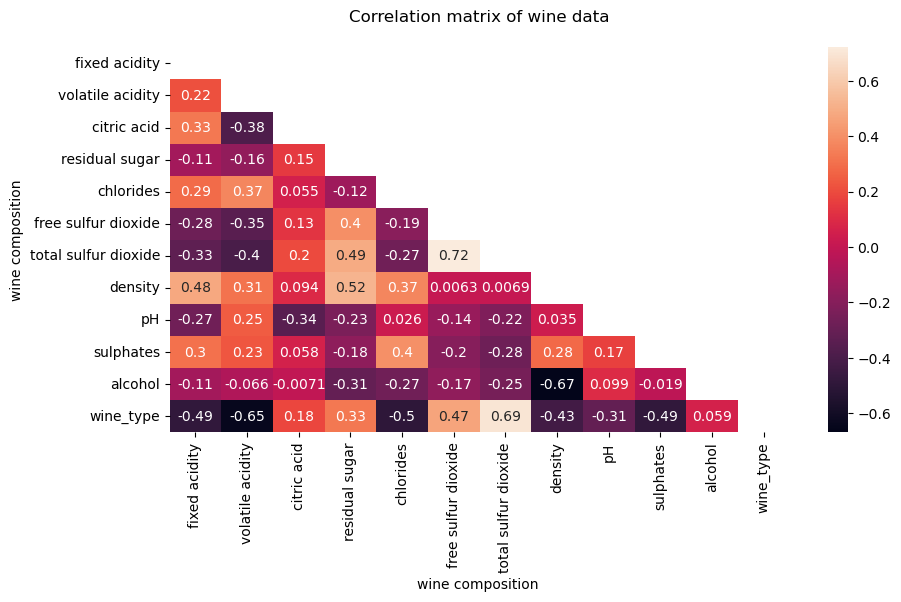

In [14]:
import matplotlib
matplotlib.style.use('default')

fig = plt.figure()
fig.set_size_inches(10,5)

wines_corrmat = wines.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(wines_corrmat)
hm = sns.heatmap(wines_corrmat, annot = True, mask=matrix)
hm.set(xlabel='wine composition ', ylabel='wine composition', title = "Correlation matrix of wine data\n")
plt.show()



In [21]:
from scipy import stats
import scipy.stats

features = wines.select_dtypes(include=['float64']).columns

for feature in features: 

    # F and p values
    f_value, p_value = stats.f_oneway(wines[wines['quality_label'] == 'low'][feature],
    wines[wines['quality_label'] == 'medium'][feature],
    wines[wines['quality_label'] == 'high'][feature])
    #print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
    print(feature,' F Statistic:', f_value, '\tp-value:', p_value)

    # anova table as output
    import statsmodels.api as sm
    from statsmodels.formula.api import ols

    # Ordinary Least Squares (OLS) model
    X = wines.iloc[:,:12]
    y = wines['quality_label']
    X = sm.add_constant(X)
    model = ols(y,X).fit()
    anova_table = sm.stats.anova_lm(model, typ=1)
    anova_table

#print('Critical Value: ', scipy.stats.f.ppf(q=0.05,dfn=2,dfd=6494))

# ## Post-Hoc Test (Tukey's HSD) to see which labels differ #

# from bioinfokit.analys import stat

# res = stat()
# res.tukey_hsd()



fixed acidity  F Statistic: 18.083920336771573 	p-value: 1.4888277205175358e-08
volatile acidity  F Statistic: 209.01762497257005 	p-value: 4.136346573036935e-88
citric acid  F Statistic: 20.998846425514344 	p-value: 8.244140973421423e-10
residual sugar  F Statistic: 6.152023248436985 	p-value: 0.0021443559549742743
chlorides  F Statistic: 104.99422510359018 	p-value: 1.9010238711889503e-45
free sulfur dioxide  F Statistic: 7.334631174786442 	p-value: 0.0006591681759194199
total sulfur dioxide  F Statistic: 6.499865250273385 	p-value: 0.001515617553184545
density  F Statistic: 273.25603038823095 	p-value: 1.0895434066298993e-113
pH  F Statistic: 3.9733648320303776 	p-value: 0.018865913313567947
sulphates  F Statistic: 4.8220439319274275 	p-value: 0.008085555750618425
alcohol  F Statistic: 635.401447450426 	p-value: 3.655443173164219e-248


# Red and White Wine Classification using Machine Learning #

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler # data normalisation with sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [24]:
# Features & Target
X = wines.select_dtypes(include=['float64'])
y = wines['wine_type'] # --> what you're trying to predict

In [25]:
# --- Data Split --- #
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# --- Feature Scaling ---- # 
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

X_train = X_train_norm
X_test = X_test_norm


In [20]:
# --- Classification Models  --- #

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score



In [21]:
models = [
           ('Log Reg',LogisticRegression()),
           ('RF',RandomForestClassifier()),
           ('KNN',KNeighborsClassifier()),
           ('SVM',SVC()), 
           ('NB',GaussianNB()),
           ('XGB',XGBClassifier())
        ]

for name, model in models: 

  model.fit(X_train, y_train)
  
  predictions = model.predict(X_test)

  # Evaluation metrics 

  # Confusion Matrix
  cm = confusion_matrix(y_test, predictions)

  TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

  print(name)

  #print('True Positive(TP)  = ', TP)
  #print('False Positive(FP) = ', FP)
  #print('True Negative(TN)  = ', TN)
  #print('False Negative(FN) = ', FN)

  # Acuuracy
  #accuracy =  (TP+TN) /(TP+FP+TN+FN)
  #print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

  # Balanced Accuracy
  Sensitivity = TP/(TP + FN); Specificity = TN/(TN + FP)
  balanced_accuracy  = (Sensitivity + Specificity)/2
  print('Balanced Accuracy: ', balanced_accuracy) 

  # Classification Report 
  print(classification_report(y_test, predictions))

  # Kappa score 
  kappa = cohen_kappa_score(predictions, y_test)
  print("Cohen-Kappa score:", kappa)

Log Reg
Accuracy of the binary classification = 0.986
Balanced Accuracy:  0.9752837640327146
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       405
           1       0.98      1.00      0.99      1191

    accuracy                           0.99      1596
   macro avg       0.99      0.98      0.98      1596
weighted avg       0.99      0.99      0.99      1596

Cohen-Kappa score: 0.963122837751829
RF
Accuracy of the binary classification = 0.994
Balanced Accuracy:  0.9897036415088473
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       405
           1       0.99      1.00      1.00      1191

    accuracy                           0.99      1596
   macro avg       1.00      0.99      0.99      1596
weighted avg       0.99      0.99      0.99      1596

Cohen-Kappa score: 0.9850251457452398
KNN
Accuracy of the binary classification = 0.991
Balanced Accuracy:  0.9879995024411481
 